In [2]:
#COMENZAMOS IMPORTANDO LAS LIBRERIAS NECESARIAS PARA EL COMIENZO (LUEGO SE AGREGARAN OTRAS SEGUN SE NECESITE)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
#Cargamos el Dataset
dfn=pd.read_excel("Datos_totales.xlsx")
dfn.head(20)

,Unnamed: 0,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion
0,0,101,210,35,35,56,1600,2021,257.7
1,1,101,462,50,50,70,1400,1988,199.6
2,2,101,462,50,50,40,800,1989,180.5
3,3,101,469,150,130,190,1462,1988,199.6
4,4,101,469,120,120,168,1400,1989,180.5
5,5,101,686,200,200,300,1500,1988,199.6
6,6,101,686,100,100,80,800,1989,180.5
7,7,101,686,300,300,480,1600,1995,197.1
8,8,101,686,200,200,360,1800,1996,393.5
9,9,101,686,200,200,400,2000,1997,283.5


In [4]:
#Borramos la columna "Unnamed"
dfn = dfn.drop("Unnamed: 0", axis=1)
dfn

,Cultivo,idDepartamento,Sup_Sembrada,Sup_Cosechada,Producción,Rendimiento,anio,Precipitacion
0,101,210,35,35,56,1600,2021,257.7
1,101,462,50,50,70,1400,1988,199.6
2,101,462,50,50,40,800,1989,180.5
3,101,469,150,130,190,1462,1988,199.6
4,101,469,120,120,168,1400,1989,180.5
...,...,...,...,...,...,...,...,...
3379,129,833,105070,105070,514843,4900,2017,419.1
3380,129,833,89875,80875,339453,4197,2018,440.8
3381,129,833,119000,119000,393100,3303,2019,395.4
3382,129,833,131000,131000,570000,4351,2020,503.3


In [5]:
#Definimos nuestra variable objetivo y separamos el Dataset para el entrenamiento
X = dfn.drop("Rendimiento", axis=1)
y=dfn.Rendimiento


In [6]:
#importamos el train test split y separamos el dataset para entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
#comenzamos utilizando un modelo de regresion lineal
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([3983.02784215, 3761.61941507, 2514.49764019, ..., 4293.80630092,
       2282.29657192, 2778.04498848])

In [9]:
#Armamos un Df comparativo
comp=pd.DataFrame({"real": y_test, "preds":y_pred})
comp

,real,preds
569,2800,3983.027842
3340,3584,3761.619415
1850,2100,2514.497640
1412,4200,4251.029516
2202,1851,1897.669536
...,...,...
2347,1200,-1073.251137
1588,1000,2342.336752
2521,4500,4293.806301
154,3100,2282.296572


Calculamos el R2 (utilizaremos esta medida para ver el grado de error)
El coeficiente de determinación, o R² está estrechamente relacionada con la MSE,tiene la ventaja de estar libre de escala
R2=1-(MSE(modelo)/MSE(baseline))

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error
r2= r2_score(y_test,y_pred)
r2

0.5692360295452686

In [40]:

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 956.6075301946563


In [41]:
import time
inicio = time.time()

# Código a medir
time.sleep(1)
# -------------

fin = time.time()
print(fin-inicio) 

1.0072262287139893


Ahora probaremos otros modelos y compararemos

In [11]:
#Probamos el Decision tree Regressor
from sklearn.tree import DecisionTreeRegressor
model2=DecisionTreeRegressor(random_state=1)
model2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [12]:
y_pred2=model2.predict(X_test)
comp2=pd.DataFrame({"real": y_test, "pred":y_pred2})
comp2

,real,pred
569,2800,2300.0
3340,3584,4300.0
1850,2100,2500.0
1412,4200,3800.0
2202,1851,1901.0
...,...,...
2347,1200,1767.0
1588,1000,1000.0
2521,4500,5000.0
154,3100,2500.0


In [13]:
r2= r2_score(y_test,y_pred2)
r2

0.8760844227425268

In [42]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2))

Mean Absolute Error: 413.81003937007875


In [14]:
#Probaremos el Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model3=RandomForestRegressor(random_state=1)
model3.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [15]:
y_pred3=model3.predict(X_test)
comp3=pd.DataFrame({"real": y_test, "pred":y_pred3})
comp3

,real,pred
569,2800,2639.30
3340,3584,3879.00
1850,2100,2324.65
1412,4200,3994.67
2202,1851,1860.05
...,...,...
2347,1200,1688.60
1588,1000,991.06
2521,4500,5062.09
154,3100,2634.00


In [16]:
r2= r2_score(y_test,y_pred3)
r2

0.9385249085840909

In [43]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred3))

Mean Absolute Error: 287.58753937007873


In [17]:
from sklearn import svm
svm_reg= svm.SVR()
regressor=svm_reg.fit(X_train, y_train)
y_pred4=regressor.predict(X_test)

In [18]:
comp4=pd.DataFrame({"real": y_test, "pred":y_pred4})
comp4.sample(10)

,real,pred
1065,2503,2537.652578
3051,700,2490.716172
959,4200,2753.403397
1751,2200,2518.894947
2505,2000,2492.104923
678,6000,2837.980066
1899,3300,2517.477457
2193,500,2495.433058
1816,2000,2492.129908
473,2400,2492.718887


In [19]:
r2= r2_score(y_test,y_pred4)
r2

0.00829438521136816

In [44]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred4))

Mean Absolute Error: 1278.7359151975875


In [20]:
from sklearn.neighbors import KNeighborsRegressor
KNN_reg=KNeighborsRegressor(n_neighbors=5)
regressor=KNN_reg.fit(X_train, y_train)
y_pred5=regressor.predict(X_test)

In [21]:
comp5=pd.DataFrame({"real": y_test, "pred":y_pred5})
comp5.sample(10)

,real,pred
1197,4500,4873.4
802,8500,8499.6
2501,4000,3320.2
685,8400,8360.6
3080,2200,2246.6
3059,2700,2700.0
123,3200,2733.4
2723,1770,1680.0
2906,0,0.0
2151,1200,1280.0


In [22]:
r2= r2_score(y_test,y_pred5)
r2

0.9429521773711178

In [45]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred5))

Mean Absolute Error: 254.28405511811022


In [23]:
#Probamos algunas tecnicas de Stacking (Ensamblar mas de 1 modelo para mejorar un resultado)
#Definimos que modelos vamos a combinar
lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=5)
rf = RandomForestRegressor(random_state=1)

In [24]:
# Store the models to combine (esto lo pongo porque lo vi en la notebook de Miguel)
estimators = [("Linear Regression", lr), ("KNN", knn), ("Random Forest", rf)]

In [25]:
#importamos la tecnica de ensamble
from sklearn.ensemble import StackingRegressor

In [26]:
#Define the super model whit a meta-stimator which is just another linear regression
ensemble= StackingRegressor(estimators=estimators, final_estimator=lr)

In [27]:
#entrenamos el super-modelo
ensemble.fit(X_train, y_train)


StackingRegressor(estimators=[('Linear Regression', LinearRegression()),
                              ('KNN', KNeighborsRegressor()),
                              ('Random Forest',
                               RandomForestRegressor(random_state=1))],
                  final_estimator=LinearRegression())

In [28]:
#evaluamos el super-modelo
y_pred_ens=ensemble.predict(X_test)

In [29]:
#vemos algunos resultados
comp_ens=pd.DataFrame({"real": y_test, "pred":y_pred_ens})
comp_ens.sample(10)

,real,pred
1545,1000,1234.919812
790,5900,5893.004406
2259,1500,1518.508316
1550,900,796.996651
1399,2206,2261.497231
1217,5500,4973.030414
2005,2500,2679.362003
2920,2400,2469.038435
1162,5500,6054.702246
3019,2600,2291.152026


In [30]:
#calculamos nuestro R2 del super-modelo
r2= r2_score(y_test,y_pred_ens)
r2

0.9617729521609623

In [46]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_ens))

Mean Absolute Error: 225.81021488624876


In [31]:
#Se logro una mejora importante


In [32]:
from sklearn import model_selection
from sklearn.metrics import r2_score

In [33]:
#ahora probamos un K-Cross validation para ver si el modelo responde de la misma manera siempre
models = []
models.append(('lr', LinearRegression()))
models.append(('knn' , KNeighborsRegressor(n_neighbors=5)))
models.append(('rf' , RandomForestRegressor(random_state=1)))
models.append(('ensemble', StackingRegressor(estimators=estimators, final_estimator=lr)))
print(models)

[('lr', LinearRegression()), ('knn', KNeighborsRegressor()), ('rf', RandomForestRegressor(random_state=1)), ('ensemble', StackingRegressor(estimators=[('Linear Regression', LinearRegression()),
                              ('KNN', KNeighborsRegressor()),
                              ('Random Forest',
                               RandomForestRegressor(random_state=1))],
                  final_estimator=LinearRegression()))]


In [34]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=6, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

lr: 0.602194 (0.033904)
knn: 0.925834 (0.023977)
rf: 0.928368 (0.021614)
ensemble: 0.950300 (0.017024)


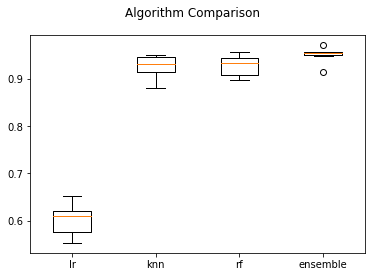

In [35]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [36]:
import time
inicio = time.time()

# Código a medir
time.sleep(1)
# -------------

fin = time.time()
print(fin-inicio) 

1.0045669078826904


In [48]:
#storia de k-flod
names = []
mae_results_cv = []
r2_results_cv = []


In [49]:
def metricas (X_train, y_train, y_test, y_pred, time_ml, method):
    time_exec = str(time_ml)
    print('Tiempo de ejecución = ' + time_exec)
    print('\n')
    print('Matriz de confusión')
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    if method == 'reg_log':
        score_train = str(log_reg.score(X_train, y_train))
    elif method == 'svm':
        score_train = str(svc.score(X_train, y_train))
    elif method == 'knn':
        score_train = str(knn.score(X_train, y_train))
    elif method == 'rand_for':
        score_train = str(rfm.score(X_train, y_train))
    elif method == 'sgd':
        score_train = str(sgd.score(X_train, y_train))
    print('Score train = ' + score_train)
    print('\n')
    acc_test = str(accuracy_score(y_test, y_pred))
    print('Accuracy test = ' + acc_test)
    prec_test = str(precision_score(y_test, y_pred))
    print('Precision test = ' + prec_test)
    sens_test = str(tp/(tp+fn))
    print('Sensivity test = ' + sens_test)
    spec_test = str(tn/(tn+fp))
    print('Specificity test = ' + spec_test)
    
    f1_scor = str(f1_score(y_test, y_pred))
    print('F1 Score = ' + f1_scor)
    mserror = str(mean_squared_error(y_test, y_pred))
    print('Mean Squared Error = ' + mserror)
    
    metricas = [score_train, acc_test, prec_test, sens_test, spec_test, f1_scor, mserror, time_exec, method]
    #print(metricas)
    headers = ['score_train', 'acc_test','prec_test', 'sens_test', 'spec_test', 'f1_scor', 'mserror', 'time', 'method']
    metricas_df = pd.DataFrame([metricas], columns = headers)
    metricas_df.head()
    
    with open('results.csv', mode='a') as write_file:
        writer_file = csv.writer(write_file, delimiter=',')
        writer_file.writerow(metricas)
        #df_results = pd.DataFrame.to_csv(metricas_df, 'results.csv')
        
def labels_csv():
    headers = ['score_train', 'acc_test','prec_test', 'sens_test', 'spec_test', 'f1_scor', 'mserror', 'time', 'method']
    with open('results.csv', mode='w') as write_file:
        writer_file = csv.writer(write_file, delimiter=',')
        writer_file.writerow(headers)
        

In [50]:
# Repeticiones para evaluar los modelos
for name, model in models_cv:
    names.append(name)
    
    mae_results_cv.append(metrics_cv(X, y,cv,model)["MAE"])
     # mae_results_cv.append(metrics_cv(X_trans, y,cv,model)["MAE"])
    
    r2_results_cv.append(metrics_cv(X, y,cv,model) ["R2"])
    # r2_results_cv.append(metrics_cv(X_trans, y,cv,model) ["R2"])


NameError: name 'models_cv' is not defined